<a href="https://colab.research.google.com/github/prince-aegon/clinical_trials_data/blob/main/MTP_bioBert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.6 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "dmis-lab/biobert-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

text = "Determine the safety and toxicity of preoperative trastuzumab (Herceptin) and&#xD; paclitaxel followed by postoperative doxorubicin and cyclophosphamide in women with locally&#xD; advanced breast cancer with HER2 overexpression. II. Determine tumor response in these&#xD; patients treated with this regimen. III. Assess the effect of this regimen on tumor histology&#xD; and the potential molecular determinants of response in these patients"
inputs = tokenizer(text, return_tensors="pt")

outputs = model(**inputs)
print(outputs.size())

AttributeError: ignored

In [ ]:
!pip install torch

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModel

model_name = "dmis-lab/biobert-v1.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)



torch.Size([1, 768])


In [ ]:
import pandas as pd
import numpy as np

In [ ]:

column= ['file_id', 'start_date', 'end_date', 'location', 'text', 'enrollment','textExt']
# for i in rang
text = "Determine the safety and toxicity of preoperative trastuzumab (Herceptin) and&#xD; paclitaxel followed by postoperative doxorubicin and cyclophosphamide in women with locally&#xD; advanced breast cancer with HER2 overexpression. II. Determine tumor response in these&#xD; patients treated with this regimen. III. Assess the effect of this regimen on tumor histology&#xD; and the potential molecular determinants of response in these patients dxjgbjabg kj's;atnfjk; sd jewgain;ion kowetjgokaeag e orjmgrjpokpermg ]samgplaer pertykep dporykpreyk drykkyp[5kyup[ oijtop]]grew    estyojy erokperryk ryes[k[pseym ]] sy5iput qewu8yhpiuef qthuiupewtn    Determine the safety and toxicity of preoperative trastuzumab (Herceptin) and&#xD; paclitaxel followed by postoperative doxorubicin and cyclophosphamide in women with locally&#xD; advanced breast cancer with HER2 overexpression. II. Determine tumor response in these&#xD; patients treated with this regimen. III. Assess the effect of this regimen on tumor histology&#xD; and the potential molecular determinants of response in these patients dxjgbjabg kj's;atnfjk; sd jewgain;ion kowetjgokaeag e orjmgrjpokpermg ]samgplaer pertykep dporykpreyk drykkyp[5kyup[ oijtop]]grew    estyojy erokperryk ryes[k[pseym ]] sy5iput qewu8yhpiuef qthuiupewtn"
# inputs = tokenizer(text, return_tensors="pt")
inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state  # This contains the embeddings for all tokens in the input text

features = embeddings.mean(dim=1)
# print(features.size())

data = []
data.append(["f1", "12/01/2002", "12/02/2002", "Australia", "text_data", 100, features])

df = pd.DataFrame(data = data, columns=column)
# print(df.size())
print()

print(df)



NameError: ignored

In [ ]:
df.to_csv('output.csv', index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


df = pd.read_csv("outputCpy.csv")

In [ ]:
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val


Index(['Unnamed: 0', 'file_id', 'start_date', 'end_date', 'location', 'text',
       'enrollment', 'bioBert_values', 'DaysBetween', 'Enrollment_rate',
       ...
       'bioBert759', 'bioBert760', 'bioBert761', 'bioBert762', 'bioBert763',
       'bioBert764', 'bioBert765', 'bioBert766', 'bioBert767', 'bioBert768'],
      dtype='object', length=778)
Epoch 1/20
71/71 [==============================] - 3s 18ms/step - loss: 1.8121 - accuracy: 0.7756 - get_f1: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.6600 - val_get_f1: 0.0000e+00
Epoch 2/20
71/71 [==============================] - 1s 14ms/step - loss: 1.8005 - accuracy: 0.7840 - get_f1: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.6600 - val_get_f1: 0.0000e+00
Epoch 3/20
71/71 [==============================] - 1s 10ms/step - loss: 1.8005 - accuracy: 0.7840 - get_f1: 0.0000e+00 - val_loss: 0.0039 - val_accuracy: 0.6600 - val_get_f1: 0.0000e+00
Epoch 4/20
71/71 [==============================] - 1s 9ms/step - loss: 1.8005 - accurac

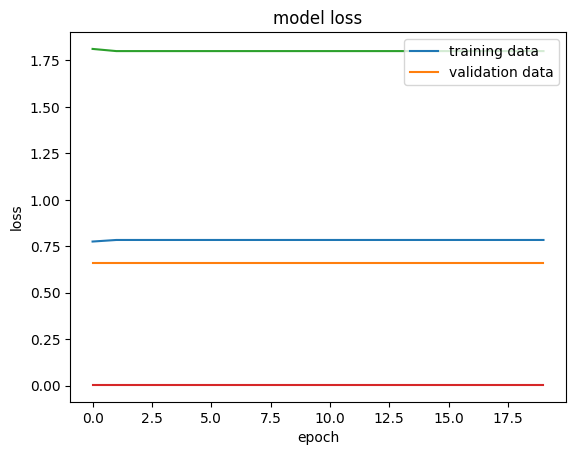

In [ ]:
print(df.columns)

X = df.drop(columns=['Unnamed: 0','file_id','start_date','end_date','location','text','enrollment','Enrollment_rate','bioBert_values'], axis=1)
Y = df['Enrollment_rate']

X_train, X_test, Y_train, Y_test = X[:2500], X[2500:], Y[:2500], Y[2500:]

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(769,)),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(8, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

# Compiling The Neural Network
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy',get_f1])

# We choose sparse_categorical_crossentropy because number of labels are less

# Training The Neural Network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=20)

# Visualizing accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

# loss, accuracy = model.evaluate(X_test, Y_test)
# print(accuracy)

Y_pred = model.predict(X_test)
# test_output = model.predict(x_test, verbose=1)


# Converting prediction probability to  labels
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)



In [ ]:
# test_output_1=np.array([np.argmax(i)  for i in test_output])
from sklearn.metrics import confusion_matrix,accuracy_score
`test_output=pd.DataFrame(Y_pred)
print(accuracy_score(Y_test,Y_pred_labels))


ValueError: ignored